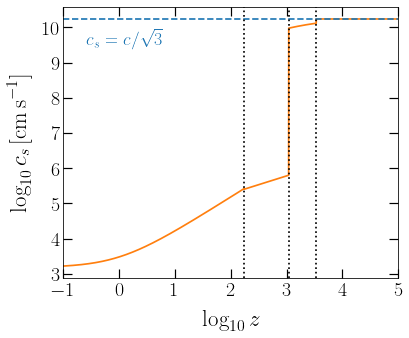

In [17]:
# Accretion of matter and radiation around the PBH from RD to MRE such that
# dm/dz = dm/dt . dt/dz with full dt/dz calculated from t_3 with
# t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)).


from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

bin_centres = np.geomspace(1e5, 1e-5, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m1_arr = np.geomspace(1e5, 1e-5, 6)
m2_arr = np.geomspace(1e5, 1e-5, 6)



# Accretion around the PBH from RD to MRE.
# Here, s = a/a_eq
# Here, v = c_s with c_s speed of sound in the surrounding medium.
# Here, γ is the ratio between the PBH mass and the horizon mass.



colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6, 5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_arr = np.geomspace(0.1, 1e5, 100000)
c_s_arr = np.zeros(len(z_arr))
for i, z in enumerate(z_arr):
    c_s_arr[i] = c_s(z) * (pc/yr) * 100
    
ax.plot(np.log10(z_arr), np.log10(c_s_arr), 'C1')


plt.text(-0.6, 9.5, '$c_{s} = c/\sqrt{3}$', fontsize = 18, color = 'C0')
    

plt.axhline(y = np.log10(c/np.sqrt(3)* (pc/yr) * 100),  color = 'C0',  linestyle = '--')
plt.axvline(x = np.log10(z_th),  color = 'k',  linestyle = ':')
plt.axvline(x = np.log10(z_rec),  color = 'k',  linestyle = ':')
plt.axvline(x = np.log10(z_eq),  color = 'k',  linestyle = ':')


plt.xlim(-1, 5)
plt.xlabel('$\mathrm{log}_{10}\, z$',  fontsize = 23, labelpad = 10)
plt.ylabel(' $\mathrm{log}_{10}\, c_{s}\, \mathrm{[cm \,s^{-1}}]$', fontsize = 23, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('c_s_z.pdf', bbox_inches = 'tight')
plt.show()

In [30]:
# Accretion of radiation as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# Using dt/dz as per t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
def m_racc(z, m):
    t = z
    y = m
    β = ((4 * π * (G**2) * η_acc)) * np.sqrt(3/(8 * π * G * ρ_c0))
    check = (Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z))
    if check < 0 or check == 0:
        print(check)
     
    dm = -β * (((m**2) * ρ_r0  * ((1 + z)**2))/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z)))))
    return  dm
    

### Accretion of baryons with ρ = ρ_b0 (1 + z)³ up to z_eq.
# Using dt/dz as per t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
def m_bacc(z, m):
    t = z
    y = m
    β = ((4 * π * (G**2) * η_acc)) * np.sqrt(3/(8 * π * G * ρ_c0))
    dm = -β * (((m**2) * ρ_b0  * (1 + z))/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z)))))
    return  dm

i = 0 , z =  [3.10135311e+09 3.10092755e+09 3.10050205e+09 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]
i = 1 , z =  [3.10135312e+10 3.10085615e+10 3.10035927e+10 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]
i = 2 , z =  [3.10135312e+11 3.10078475e+11 3.10021650e+11 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]


/tmp/ipykernel_13829/2954593.py:11: RuntimeWarning: invalid value encountered in sqrt
  dm = -β * (((m**2) * ρ_r0  * ((1 + z)**2))/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z)))))


i = 3 , z =  [3.10135312e+12 3.10071336e+12 3.10007373e+12 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]
i = 4 , z =  [3.10135312e+13 3.10064196e+13 3.09993097e+13 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]
i = 5 , z =  [3.10135312e+14 3.10057056e+14 3.09978821e+14 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]


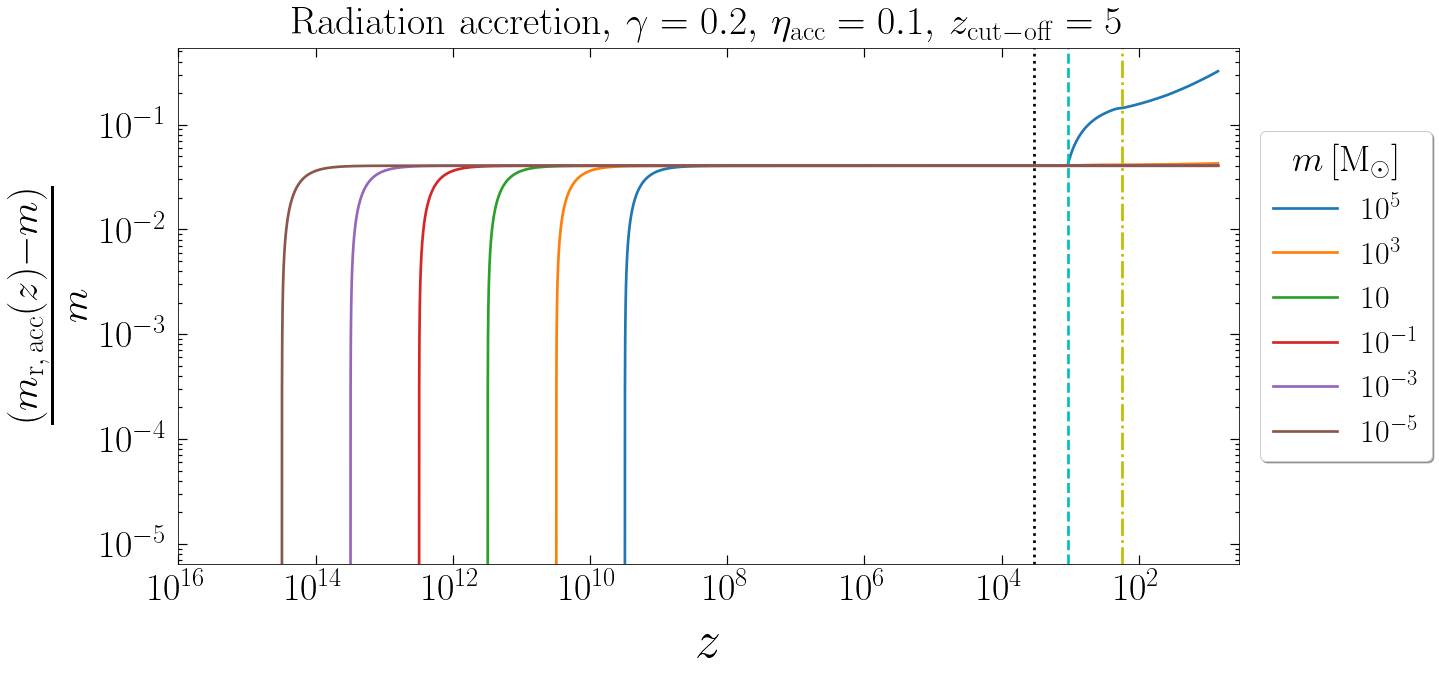

In [31]:
# Radiation accretion in radiation domination to upto z_cut-off = 5.

colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut = 7
N = 100000
for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    γ = 0.2
    z_1i = z_pbh(m1,  γ)
    y_1i = m1
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_racc, t_span = [t1[0], t1[-1]], y0 = [y_1i],  t_eval = t1)
    t1 = sol1.t
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_racc, t_span = [t2[0], t2[-1]], y0 = [y_2i],  t_eval = t2)
    t2 = sol2.t
    y2 = sol2.y[0]
    
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_racc, t_span = [t3[0], t3[-1]], y0 = [y_3i],  t_eval = t3)
    t3 = sol3.t
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 80
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_racc, t_span = [t4[0], t4[-1]], y0 = [y_4i],  t_eval = t4)
    t4 = sol4.t
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = 20
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_racc, t_span = [t5[0], t5[-1]], y0 = [y_5i],  t_eval = t5)
    y5 = sol5.y[0]
    
    
    z_6i = z_cut_off5
    y_6i = y5[-1]
    z_cut_off6 = z_cut
    t6 = np.geomspace(z_6i, z_cut, N)
    sol6 = solve_ivp(m_racc, t_span = [t6[0], t6[-1]], y0 = [y_6i],  t_eval = t6)
    y6 = sol6.y[0]
    
    
    T = np.concatenate((t1, t2, t3, t4, t5, t6), axis = None)
    Y = np.concatenate((y1, y2, y3, y4, y5, y6), axis = None)
    
    print("i =", i, "," , "z = ", T)
    ax.loglog(T, ((Y - m1)/m1))

        
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec,  color = 'c',  linestyle = '--')
plt.axvline(x = z_th,  color = 'y',  linestyle = '-.')

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{r, \, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$', 
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_cut)
plt.xscale('log')
plt.title(r'Radiation accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1,\, z_\mathrm{cut-off} =  5$', fontsize = 40, pad = 13)
plt.savefig('racc_z_cutoff5.pdf', bbox_inches = 'tight')
plt.show()

i = 0 , z =  [3.10135311e+09 3.10092755e+09 3.10050205e+09 ... 8.55449969e+01
 8.00000000e+01 2.00000000e+01]
i = 1 , z =  [3.10135312e+10 3.10085615e+10 3.10035927e+10 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]
i = 2 , z =  [3.10135312e+11 3.10078475e+11 3.10021650e+11 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]


/tmp/ipykernel_13829/2954593.py:21: RuntimeWarning: invalid value encountered in sqrt
  dm = -β * (((m**2) * ρ_b0  * (1 + z))/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z)))))
/tmp/ipykernel_13829/2954593.py:21: RuntimeWarning: invalid value encountered in sqrt
  dm = -β * (((m**2) * ρ_b0  * (1 + z))/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z)))))


i = 3 , z =  [3.10135312e+12 3.10071336e+12 3.10007373e+12 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]
i = 4 , z =  [3.10135312e+13 3.10064196e+13 3.09993097e+13 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]
i = 5 , z =  [3.10135312e+14 3.10057056e+14 3.09978821e+14 ... 7.00014698e+00
 7.00007349e+00 7.00000000e+00]


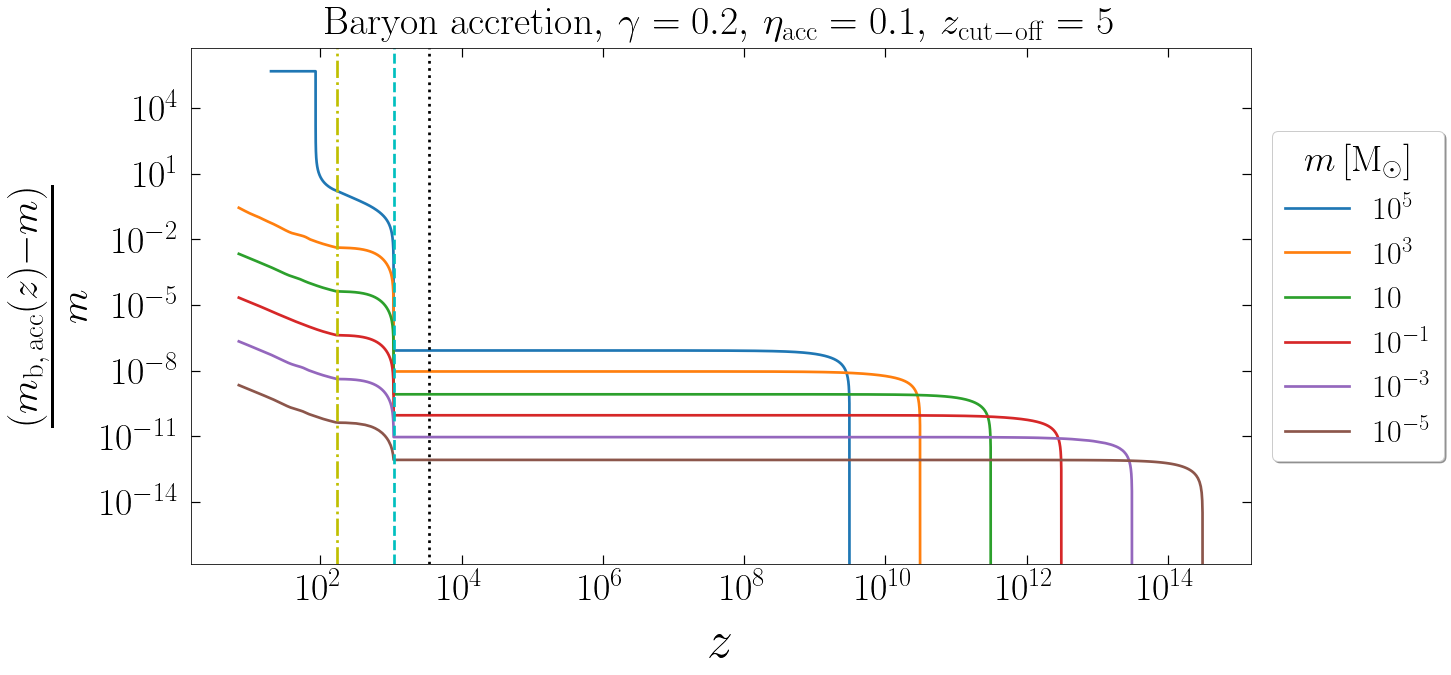

In [33]:
# Baryon accretion in radiation domination to upto z_cut-off = 5.

colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut = 7
N = 100000
for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    γ = 0.2
    z_1i = z_pbh(m1,  γ)
    y_1i = m1
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_bacc, t_span = [t1[0], t1[-1]], y0 = [y_1i],  t_eval = t1)
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_bacc, t_span = [t2[0], t2[-1]], y0 = [y_2i],  t_eval = t2)
    y2 = sol2.y[0]
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_bacc, t_span = [t3[0], t3[-1]], y0 = [y_3i],  t_eval = t3)
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 80
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_bacc, t_span = [t4[0], t4[-1]], y0 = [y_4i],  t_eval = t4)
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = 20
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_bacc, t_span = [t5[0], t5[-1]], y0 = [y_5i],  t_eval = t5)
    y5 = sol5.y[0]
    
    
    z_6i = z_cut_off5
    y_6i = y5[-1]
    z_cut_off6 = z_cut
    t6 = np.geomspace(z_6i, z_cut, N)
    sol6 = solve_ivp(m_bacc, t_span = [t6[0], t6[-1]], y0 = [y_6i],  t_eval = t6)
    y6 = sol6.y[0]
   
    
    
    
    T = np.concatenate((sol1.t, sol2.t, sol3.t, sol4.t, sol5.t, sol6.t), axis=None)
    print("i =", i, "," , "z = ", T)
    Y = np.concatenate((y1, y2, y3, y4, y5, y6), axis=None)
    
    ax.loglog(T, ((Y - m1)/m1))

        
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec,  color = 'c',  linestyle = '--')
plt.axvline(x = z_th,  color = 'y',  linestyle = '-.')
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{b, \, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$', 
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xscale('log')
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1, \, z_\mathrm{cut-off} = 5$', fontsize = 40, pad = 13)
plt.savefig('bacc_z_cutoff5.pdf', bbox_inches = 'tight')
plt.show()

In [7]:
# Accretion in radiation domination for different values of z_cut-off.


N = 1000
bin_centres = np.geomspace(1e5, 1e-5, N)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m1_arr = np.geomspace(1e5, 1e-5, N)
m2_arr = np.geomspace(1e5, 1e-5, N)

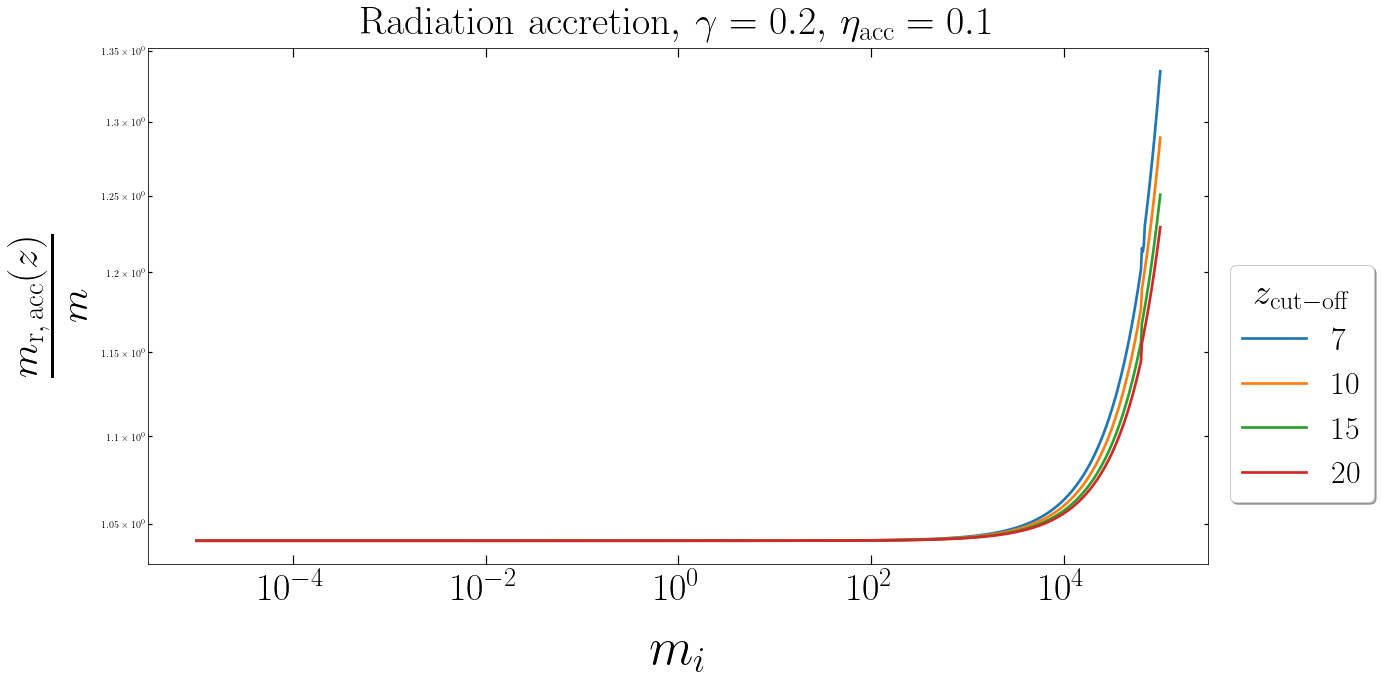

In [8]:
# Radiation accretion in radiation domination for different values of z_cut-off.

colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut_arr = np.array([7, 10, 15, 20])
mf_arr = np.zeros(len(m1_arr))
colors = ['C0', 'C1', 'C2', 'C3']
plot_lines = []


for i, (z_cut, color) in enumerate(zip(z_cut_arr, colors)):
    for j, m1 in enumerate(m1_arr):
        γ = 0.2
        z_1i = z_pbh(m1,  γ)
        y_1i = m1
        z_cut_off1 = z_eq
        t1 = np.geomspace(z_1i, z_cut_off1, 1000)
        sol1 = solve_ivp(m_racc, t_span = [t1[0], t1[-1]], y0 = [y_1i],  t_eval = t1)
        t1 = sol1.t
        y1 = sol1.y[0]


        z_2i = z_eq
        y_2i = y1[-1]
        z_cut_off2 = z_rec
        t2 = np.geomspace(z_2i, z_cut_off2, 1000)
        sol2 = solve_ivp(m_racc, t_span = [t2[0], t2[-1]], y0 = [y_2i],  t_eval = t2)
        t2 = sol2.t
        y2 = sol2.y[0]



        z_3i = z_rec
        y_3i = y2[-1]
        z_cut_off3 = z_th
        t3 = np.geomspace(z_3i, z_cut_off3, 1000)
        sol3 = solve_ivp(m_racc, t_span = [t3[0], t3[-1]], y0 = [y_3i],  t_eval = t3)
        t3 = sol3.t
        y3 = sol3.y[0]



        z_4i = z_th
        y_4i = y3[-1]
        z_cut_off4 = z_cut
        t4 = np.geomspace(z_4i, z_cut_off4, 1000)
        sol4 = solve_ivp(m_racc, t_span = [t4[0], t4[-1]], y0 = [y_4i],  t_eval = t4)
        t4 = sol4.t
        y4 = sol4.y[0]

        T = np.concatenate((t1, t2, t3, t4), axis = None)
        Y = np.concatenate((y1, y2, y3, y4), axis = None)

        mf_arr[j] = sol4.y[0][-1]
        
    ax.loglog(m1_arr, np.divide(mf_arr, m1_arr))
        
        
       
    
    
    

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)



plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$m_{i}$',fontsize = 52, labelpad = 20)
plt.ylabel(r'$\frac{m_\mathrm{r, \, acc}(z)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$7$', '$10$', '$15$', '$20$'], 
           prop = {'size':32}, loc = (1.02, 0.12), shadow = True, 
           title = '$z_\mathrm{cut-off}$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
#plt.xlim(1e16, 0.5*z_cut_off)
plt.xscale('log')
plt.title(r'Radiation accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1$', fontsize = 40, pad = 13)
plt.savefig('racc_z_diff_cutoff.pdf', bbox_inches = 'tight')
plt.show()

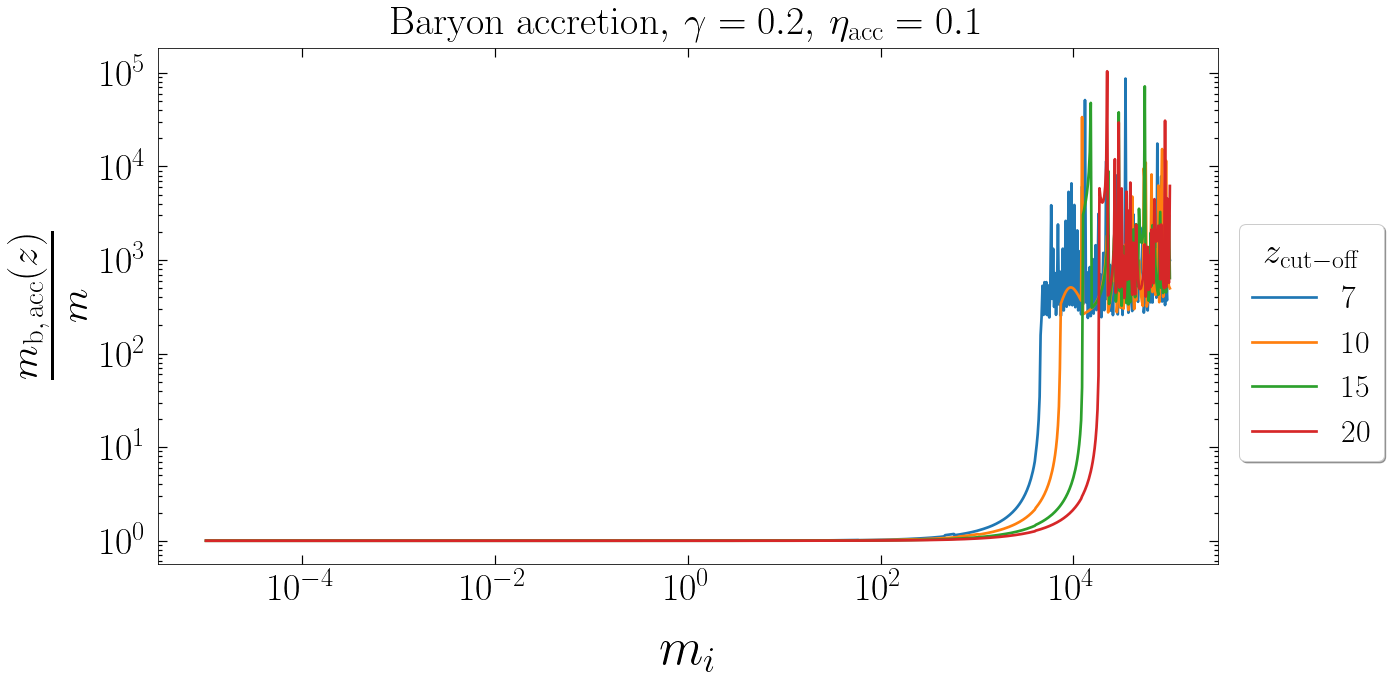

In [9]:
# Baryon accretion in radiation domination for different values of z_cut-off.

colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut_arr = np.array([7, 10, 15, 20])
mf_arr = np.zeros(len(m1_arr))
colors = ['C0', 'C1', 'C2', 'C3']
plot_lines = []


for i, (z_cut, color) in enumerate(zip(z_cut_arr, colors)):
    for j, m1 in enumerate(m1_arr):
        γ = 0.2
        z_1i = z_pbh(m1,  γ)
        y_1i = m1
        z_cut_off1 = z_eq
        t1 = np.geomspace(z_1i, z_cut_off1, 1000)
        sol1 = solve_ivp(m_bacc, t_span = [t1[0], t1[-1]], y0 = [y_1i],  t_eval = t1)
        t1 = sol1.t
        y1 = sol1.y[0]


        z_2i = z_eq
        y_2i = y1[-1]
        z_cut_off2 = z_rec
        t2 = np.geomspace(z_2i, z_cut_off2, 1000)
        sol2 = solve_ivp(m_bacc, t_span = [t2[0], t2[-1]], y0 = [y_2i],  t_eval = t2)
        t2 = sol2.t
        y2 = sol2.y[0]



        z_3i = z_rec
        y_3i = y2[-1]
        z_cut_off3 = z_th
        t3 = np.geomspace(z_3i, z_cut_off3, 1000)
        sol3 = solve_ivp(m_bacc, t_span = [t3[0], t3[-1]], y0 = [y_3i],  t_eval = t3)
        t3 = sol3.t
        y3 = sol3.y[0]



        z_4i = z_th
        y_4i = y3[-1]
        z_cut_off4 = z_cut
        t4 = np.geomspace(z_4i, z_cut_off4, 1000)
        sol4 = solve_ivp(m_bacc, t_span = [t4[0], t4[-1]], y0 = [y_4i],  t_eval = t4)
        t4 = sol4.t
        y4 = sol4.y[0]

        T = np.concatenate((t1, t2, t3, t4), axis = None)
        Y = np.concatenate((y1, y2, y3, y4), axis = None)

        mf_arr[j] = sol4.y[0][-1]
        
    ax.loglog(m1_arr, np.divide(mf_arr, m1_arr))
        
        
       
    
    
    

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)



plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$m_{i}$',fontsize = 52, labelpad = 20)
plt.ylabel(r'$\frac{m_\mathrm{b, \, acc}(z)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$7$', '$10$', '$15$', '$20$'], 
           prop = {'size':32}, loc = (1.02, 0.2), shadow = True, 
           title = '$z_\mathrm{cut-off}$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
#plt.xlim(1e16, 0.5*z_cut_off)
plt.xscale('log')
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1$', fontsize = 40, pad = 13)
plt.savefig('bacc_z_diff_cutoff.pdf', bbox_inches = 'tight')
plt.show()